In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
%run functions.py

### Importação dos Dados

In [ ]:
images = pd.read_csv("imageMNIST.csv", header=None, decimal=',')
labels = np.array(pd.read_csv("labelMNIST.csv", header=None))
X, zero_cols = zero_col(images)
y = np.asarray(labels)


### Treinamento

In [111]:
input_layer_size = X.shape[1]
hidden_layer_size = np.array([25])#Array com as camadas escondidas e suas respectivas quantidades de neurônios
num_labels = len(np.unique(y))
Lambda = 0.03
alpha = 0.8
nbr_iter = 400

theta, J_history = backpropagation(X, y, num_labels, hidden_layer_size, Lambda, alpha, nbr_iter, regularizada=True)

In [112]:
pred = prediction(X,theta)
print("Training Set Accuracy:",np.sum(pred == y)/len(y)*100,"%")

Training Set Accuracy: 92.06 %


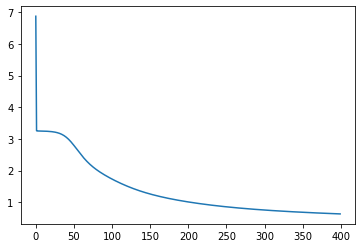

In [113]:
plt.plot(J_history)

## Visualização de $\Theta^{(1)}$

In [104]:
graf_theta = np.delete(theta[0], 0, axis=1)
for i in zero_cols:
    if i >= graf_theta.shape[1]:
        graf_theta = np.append(graf_theta, np.zeros(graf_theta.shape[0]).reshape([graf_theta.shape[0], 1]), axis=1)
    else:
        graf_theta = np.insert(graf_theta, i, np.zeros(graf_theta.shape[0]), axis=1)

minimo = np.min(graf_theta, axis=1)
maximo = np.max(graf_theta, axis=1)
for j in range(graf_theta.shape[1]):
    graf_theta[:,j] = (graf_theta[:,j] - minimo) / (maximo - minimo)

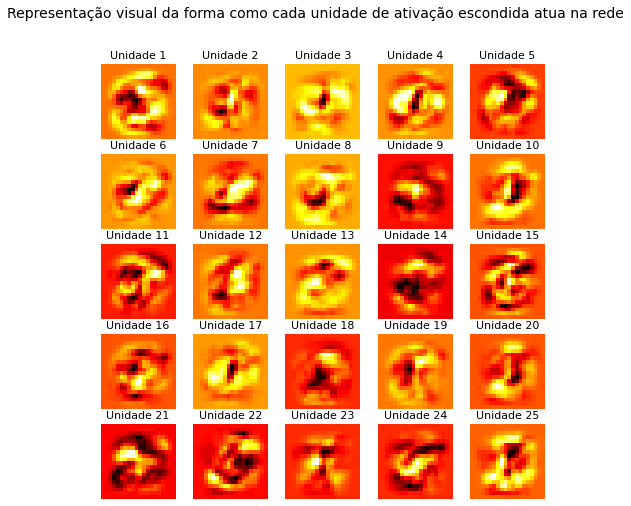

In [105]:
fig, axis = plt.subplots(5, 5,figsize=(8,8))
for i in range(5):
    for j in range(5):
        axis[i,j].imshow(graf_theta[5*i+j,:].reshape(20,20,order="F"),cmap='hot')
        axis[i,j].axis("off")
        axis[i,j].set_title('Unidade {}'.format(str(5*i+j+1)), fontsize=11)
fig.suptitle('Representação visual da forma como cada unidade de ativação escondida atua na rede', fontsize=14)
plt.show()

## Checagem do Gradiente

In [106]:
m = 5
_X = []
_y = []
for i in range(m):
    _X.append(np.random.randint(0,100,3))
    _y.append(np.random.randint(0,4,1))
    
_X = np.array(_X)
_y = np.array(_y)
input_layer_size = _X.shape[1]
hidden_layer_size = np.array([5])
num_labels = 3
Lambda = 0.03
alpha = 0.8
eps = 1e-4
nbr_iter = 1500

grad, grad_approx = checkGradient(_X, _y, num_labels, input_layer_size, hidden_layer_size, Lambda, alpha, eps, regularizada = True)
num, den = 0, 0

num =  (np.linalg.norm(np.asarray(grad) - np.asarray(grad_approx)))
den =  (np.linalg.norm(np.asarray(grad)) + np.linalg.norm(np.asarray(grad_approx)))

diferenca = num/den
if diferenca < eps:
    print("O Gradiente está certo - A diferença entre o grad e o grad_approx é: " + str(diferenca))
else:
    print("O Gradiente está errado - A diferença entre o grad e o grad_approx é: " + str(diferenca))


O Gradiente está certo - A diferença entre o grad e o grad_approx é: 4.730834529452237e-07


## Gradiente Conjugado

In [109]:
# Gradiente Conjugado
m = 20
_X = []
_y = []
for i in range(m):
    _X.append(np.random.randint(0,100,3))
    _y.append(np.random.randint(0,4,1))
    
_X = np.array(_X)
_y = np.array(_y)

input_layer_size = _X.shape[1]
hidden_layer_size = np.array([5])
num_labels = len(np.unique(_y))
Lambda = 1
alpha = 0.8
nbr_iter = 400

res = gradientConjugate(_X, _y, alpha, nbr_iter, Lambda, input_layer_size, hidden_layer_size, num_labels, regularizada = True)
print(res)


      fun: 1.3564839680665575
 hess_inv: array([[ 4.04232199e+03, -1.40755209e+01, -2.48475902e+01, ...,
        -4.92734054e+00, -1.76738306e+00, -7.74743963e+00],
       [-1.40755209e+01,  1.46372990e+00,  7.95352211e-01, ...,
         1.78195955e-01,  1.00904512e-01, -4.09874094e-02],
       [-2.48475902e+01,  7.95352211e-01,  9.33993918e-01, ...,
         9.29027410e-02,  8.65871342e-02, -3.25066471e-02],
       ...,
       [-4.92734054e+00,  1.78195955e-01,  9.29027410e-02, ...,
         1.08871072e+01,  3.31828801e+00,  2.23824119e+00],
       [-1.76738306e+00,  1.00904512e-01,  8.65871342e-02, ...,
         3.31828801e+00,  3.56051537e+00,  3.51156868e+00],
       [-7.74743963e+00, -4.09874094e-02, -3.25066471e-02, ...,
         2.23824119e+00,  3.51156868e+00,  9.62137236e+00]])
      jac: array([ 4.17232513e-07, -4.47034836e-08, -1.84774399e-06, -9.08970833e-07,
        2.23517418e-07, -3.12924385e-06, -1.49011612e-06,  1.28149986e-06,
       -4.17232513e-07,  8.94069672e-08, 

In [110]:
_theta = reshapeTheta(res.x, input_layer_size, hidden_layer_size, num_labels)
pred = prediction(_X,_theta)
print("Training Set Accuracy:",np.sum(pred == _y.T)/len(_y)*100,"%")


Training Set Accuracy: 60.0 %
